In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import yahoo_fin.stock_info as si
import math
counter = int(1)

In [2]:
ticker = "AAPL"
cashflow = yf.Ticker(ticker).cashflow
cashflow

,2021-09-25,2020-09-26,2019-09-28,2018-09-29
Investments,-2.819000e+09,5.335000e+09,5.809300e+10,3.084500e+10
Change To Liabilities,1.400200e+10,-1.981000e+09,-2.548000e+09,9.172000e+09
Total Cashflows From Investing Activities,-1.454500e+10,-4.289000e+09,4.589600e+10,1.606600e+10
Net Borrowings,1.266500e+10,2.499000e+09,-7.819000e+09,4.320000e+08
Total Cash From Financing Activities,-9.335300e+10,-8.682000e+10,-9.097600e+10,-8.787600e+10
Change To Operating Activities,-6.146000e+09,8.810000e+08,-8.960000e+08,3.001600e+10
Issuance Of Stock,1.105000e+09,8.800000e+08,7.810000e+08,6.690000e+08
Net Income,9.468000e+10,5.741100e+10,5.525600e+10,5.953100e+10
Change In Cash,-3.860000e+09,-1.043500e+10,2.431100e+10,5.624000e+09
Repurchase Of Stock,-9.252700e+10,-7.599200e+10,-6.971400e+10,-7.526500e+10


In [3]:
cashflowStatements = []
cashflow = yf.Ticker(ticker).cashflow
freeCashFlow4 = float(cashflow.iloc[10][0]) + (cashflow.iloc[-1][0])
freeCashFlow3 = float(cashflow.iloc[10][1]) + (cashflow.iloc[-1][1])
freeCashFlow2 = float(cashflow.iloc[10][2]) + (cashflow.iloc[-1][2])
freeCashFlow1 = float(cashflow.iloc[10][3]) + (cashflow.iloc[-1][3])
freeCashFlow35 = float(freeCashFlow4 + freeCashFlow3)/ 2
freeCashFlow25 = float(freeCashFlow3 + freeCashFlow2) / 2
freeCashFlow15 = float(freeCashFlow2 + freeCashFlow1) / 2
cashflowStatements.append(freeCashFlow4)
cashflowStatements.append(freeCashFlow35)
cashflowStatements.append(freeCashFlow3)
cashflowStatements.append(freeCashFlow25)
cashflowStatements.append(freeCashFlow2)
cashflowStatements.append(freeCashFlow15)
cashflowStatements.append(freeCashFlow1)
years = [4.0,3.5,3.0,2.5,2.0,1.5,1.0]
df = pd.DataFrame()
df [ "Cash Flow Statements"] = cashflowStatements
df [" Years"] = years
y = df.iloc[:, 0].values
X = df.iloc[:, 1].values
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
freeCashFlow2


58896000000.0

In [4]:
df = pd.DataFrame()
df [ "Cash Flow Statements"] = cashflowStatements
df [" Years"] = years
df

,Cash Flow Statements,Years
0,9.295300e+10,4.0
1,8.315900e+10,3.5
2,7.336500e+10,3.0
3,6.613050e+10,2.5
4,5.889600e+10,2.0
5,6.150850e+10,1.5
6,6.412100e+10,1.0


In [5]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [6]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/Users/parikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

Text(0, 0.5, 'Free Cash Flow')

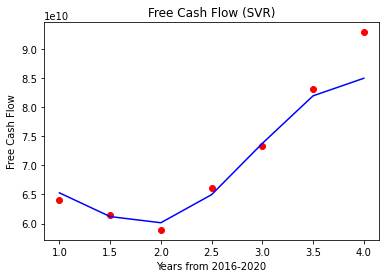

In [7]:
##Based off of regression modeling of growth, we were able to determine that the best regression model of growth was Support Vector Regression 
fig = plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
fig = plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Free Cash Flow (SVR)')
plt.xlabel('Years from 2016-2020')
plt.ylabel('Free Cash Flow')

Text(0, 0.5, 'Free Cash Flow')

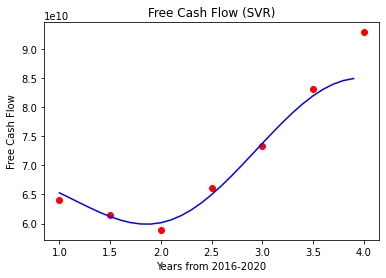

In [8]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
fig = plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
fig = plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Free Cash Flow (SVR)')
plt.xlabel('Years from 2016-2020')
plt.ylabel('Free Cash Flow')

In [9]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[4]])))

array([8.50230493e+10])

In [10]:
from sklearn.metrics import r2_score
svrr2 = r2_score(sc_y.inverse_transform(y), sc_y.inverse_transform(regressor.predict(X)))
svrr2

0.9269913792112401

In [11]:
##Decision Tree Regression will be disregarded because it gave a regression of equal to 1. 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)
dtr2 = r2_score(sc_y.inverse_transform(y), sc_y.inverse_transform(regressor.predict(X)))
dtr2

1.0

In [12]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)
rfr2 = r2_score(sc_y.inverse_transform(y),sc_y.inverse_transform(regressor.predict(X)))
rfr2

<ipython-input-12-670663e3ddf8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, y)


0.9572328824408801

In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
pr2 = r2_score(y,lin_reg_2.predict(poly_reg.fit_transform(X)))
pr2

0.9944835715111076

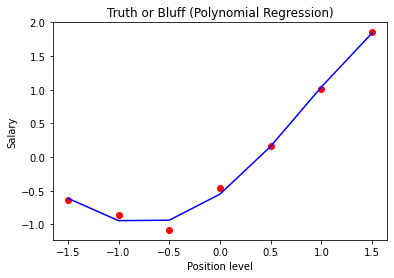

In [14]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

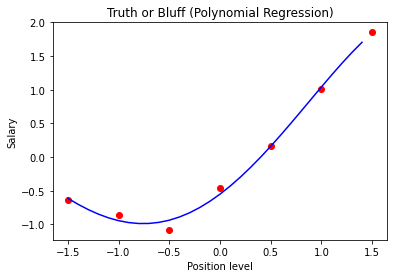

In [15]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

0.9602543447499108
0.8244237211965688
0.6387310309712533
[[4. ]
 [3.5]
 [3. ]
 [2.5]
 [2. ]
 [1.5]
 [1. ]]
[[-4.86370e+10]
 [-3.85435e+10]
 [-2.84500e+10]
 [-3.03435e+10]
 [-3.22370e+10]
 [-2.89650e+10]
 [-2.56930e+10]]


<ipython-input-16-deeca9c993ca>:44: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, abs(y))
/Users/parikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


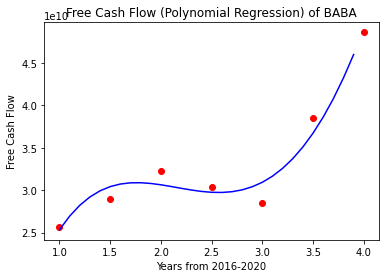

0.9602543447499108
410189334415.89954


In [16]:
ticker = "BABA"
cashflowStatements = []
cashflow = yf.Ticker(ticker).cashflow
freeCashFlow4 = float(cashflow.iloc[10][0]) + (cashflow.iloc[-1][0])
freeCashFlow3 = float(cashflow.iloc[10][1]) + (cashflow.iloc[-1][1])
freeCashFlow2 = float(cashflow.iloc[10][2]) + (cashflow.iloc[-1][2])
freeCashFlow1 = float(cashflow.iloc[10][3]) + (cashflow.iloc[-1][3])
freeCashFlow35 = float(freeCashFlow4 + freeCashFlow3)/ 2
freeCashFlow25 = float(freeCashFlow3 + freeCashFlow2) / 2
freeCashFlow15 = float(freeCashFlow2 + freeCashFlow1) / 2
cashflowStatements.append(freeCashFlow4)
cashflowStatements.append(freeCashFlow35)
cashflowStatements.append(freeCashFlow3)
cashflowStatements.append(freeCashFlow25)
cashflowStatements.append(freeCashFlow2)
cashflowStatements.append(freeCashFlow15)
cashflowStatements.append(freeCashFlow1)
years = [4.0,3.5,3.0,2.5,2.0,1.5,1.0]
df = pd.DataFrame()
df [ "Cash Flow Statements"] = cashflowStatements
df [" Years"] = years
y = df.iloc[:, 0].values
X = df.iloc[:, 1].values
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
forecast = []
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, abs(y))
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, abs(y))
pr2 = r2_score(abs(y),lin_reg_2.predict(poly_reg.fit_transform(X)))
print(pr2)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, abs(y))
rfr2 = r2_score(sc_y.inverse_transform(abs(y)),sc_y.inverse_transform(regressor.predict(X)))
print(rfr2)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, abs(y))
from sklearn.metrics import r2_score
svrr2 = r2_score(sc_y.inverse_transform(abs(y)), sc_y.inverse_transform(regressor.predict(X)))
print(svrr2)
y = df.iloc[:, 0].values
X = df.iloc[:, 1].values
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)
try:
    if(pr2 > rfr2 and pr2 > svrr2):
        from sklearn.linear_model import LinearRegression
        lin_reg = LinearRegression()
        lin_reg.fit(X, abs(y))
        from sklearn.preprocessing import PolynomialFeatures
        poly_reg = PolynomialFeatures(degree = 4)
        X_poly = poly_reg.fit_transform(X)
        lin_reg_2 = LinearRegression()
        lin_reg_2.fit(X_poly, abs(y))
        pr2 = r2_score(abs(y),lin_reg_2.predict(poly_reg.fit_transform(X)))
        #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[4.5]]))))
        forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[5.0]]))))
        #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[5.5]]))))
        forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[6.0]]))))
        #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))))
        forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[7.0]]))))
        #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[7.5]]))))
        forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[8.0]]))))
        X_grid = np.arange(min(X), max(X), 0.1)
        X_grid = X_grid.reshape((len(X_grid), 1))
        plt.scatter(X, abs(y), color = 'red')
        print(X)
        print(y)
        plt.plot(X_grid, abs(lin_reg_2.predict(poly_reg.fit_transform(X_grid))), color = 'blue')
        plt.title('Free Cash Flow (Polynomial Regression) of '+ ticker)
        plt.xlabel('Years from 2016-2020')
        plt.ylabel('Free Cash Flow')
        plt.show()
        print(pr2)
    elif(rfr2 > pr2 and rfr2 > svrr2): 
        from sklearn.preprocessing import StandardScaler
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        X = sc_X.fit_transform(X)
        y = sc_y.fit_transform(y)
        from sklearn.ensemble import RandomForestRegressor
        regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
        regressor.fit(X, y)
        rfr2 = r2_score(sc_y.inverse_transform(y),sc_y.inverse_transform(regressor.predict(X)))
        rfr2
        #forecast.append(abs(regressor.predict([[4.5]])))
        forecast.append(abs(regressor.predict([[5.0]])))
        #forecast.append(abs(regressor.predict([[5.5]])))
        forecast.append(abs(regressor.predict([[6.0]])))
        #forecast.append(abs(regressor.predict([[6.5]])))
        forecast.append(abs(regressor.predict([[7.0]])))
        #forecast.append(abs(regressor.predict([[7.5]])))
        forecast.append(abs(regressor.predict([[8.0]])))
        X_grid = np.arange(min(X), max(X), 0.01)
        X_grid = X_grid.reshape((len(X_grid), 1))
        plt.scatter(X, y, color = 'red')
        plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
        plt.title('Free Cash Flow (Random Forest Regression) of '+ ticker)
        plt.xlabel('Years from 2016-2020')
        plt.ylabel('Free Cash Flow')
        plt.show()
        print(rfr2)
    elif(svrr2 > pr2 and svrr2 > rfr2):
        from sklearn.preprocessing import StandardScaler
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        X = sc_X.fit_transform(X)
        y = sc_y.fit_transform(y)
        from sklearn.svm import SVR
        regressor = SVR(kernel = 'rbf')
        regressor.fit(X, y)
        from sklearn.metrics import r2_score
        svrr2 = r2_score(sc_y.inverse_transform(y), sc_y.inverse_transform(regressor.predict(X)))
        svrr2
        #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[4.5]])))))
        forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[5.0]])))))
        #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[5.5]])))))
        forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.0]])))))
        #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))))
        forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[7.0]])))))
        #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[7.5]])))))
        forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[8.0]])))))
        X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
        X_grid = X_grid.reshape((len(X_grid), 1))
        fig = plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
        fig = plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
        plt.title('Free Cash Flow (SVR) of '+ ticker)
        plt.xlabel('Years from 2016-2020')
        plt.ylabel('Free Cash Flow')
        print(svrr2)
    print(float(forecast[3]))

except:
    print("This company has negative cash flows, or is a recent startup. This is too risky of a company to invest in. ")




In [17]:
#TYPICALLY, THE DISCOUNT RATE IS SETUP BETWEEN 6 AND 12 PERCENT. THEREFORE, THE DISCOUNT RATE WILL BE SET TO 9%.
dr = 0.09
count = float(0)
totalFreeCashFlow = float(0)
for t in range(len(forecast)):
    val1 = (forecast[t] / pow((1+dr),t+1))
    totalFreeCashFlow += forecast[t]
    count += val1
count = count[0][0]
totalFreeCashFlow = totalFreeCashFlow[0][0]
yf.Ticker(ticker[0])
roi = 1 - (count/totalFreeCashFlow)
percentGrowth = ((forecast[3]-forecast[0])/ forecast[0]*4)
totalPercentGrowth= ((10/4) * (percentGrowth**10)) ** (1/10)
intrinsicValue = totalPercentGrowth * forecast[0]
stock = yf.Ticker(ticker)
lastDay= stock.history(period="1d")
lastDay = lastDay['Close'][0]
print(lastDay)
intrinsicVal  = float(lastDay - (lastDay * roi))
intrinsicVal

print("The valuation is equal to $" , intrinsicVal , ". Since the stock price is above the intrinsic value, it is not a good idea to invest in it. ")


158.72999572753906
The valuation is equal to $ 122.67303653671193 . Since the stock price is above the intrinsic value, it is not a good idea to invest in it. 


In [18]:
def findStockTicker(ticker):
    stock = yf.Ticker(ticker)
    lastDay= stock.history(period="1d")
    lastDay = lastDay['Close'][0]
    lastDay = round(lastDay, 2)
    return lastDay
ticker1 = "BABA"
print(findStockTicker(ticker))


158.73


In [19]:
def intrinsicValue(ticker):
    cashflowStatements = []
    cashflow = yf.Ticker(ticker).cashflow
    freeCashFlow4 = float(cashflow.iloc[10][0]) + (cashflow.iloc[-1][0])
    freeCashFlow3 = float(cashflow.iloc[10][1]) + (cashflow.iloc[-1][1])
    freeCashFlow2 = float(cashflow.iloc[10][2]) + (cashflow.iloc[-1][2])
    freeCashFlow1 = float(cashflow.iloc[10][3]) + (cashflow.iloc[-1][3])
    freeCashFlow35 = float(freeCashFlow4 + freeCashFlow3)/ 2
    freeCashFlow25 = float(freeCashFlow3 + freeCashFlow2) / 2
    freeCashFlow15 = float(freeCashFlow2 + freeCashFlow1) / 2
    cashflowStatements.append(freeCashFlow4)
    cashflowStatements.append(freeCashFlow35)
    cashflowStatements.append(freeCashFlow3)
    cashflowStatements.append(freeCashFlow25)
    cashflowStatements.append(freeCashFlow2)
    cashflowStatements.append(freeCashFlow15)
    cashflowStatements.append(freeCashFlow1)
    years = [4.0,3.5,3.0,2.5,2.0,1.5,1.0]
    df = pd.DataFrame()
    df [ "Cash Flow Statements"] = cashflowStatements
    df [" Years"] = years
    y = df.iloc[:, 0].values
    X = df.iloc[:, 1].values
    X = X.reshape(len(X),1)
    y = y.reshape(len(y),1)
    forecast = []
    try:

        from sklearn.linear_model import LinearRegression
        lin_reg = LinearRegression()
        lin_reg.fit(X, abs(y))
        from sklearn.preprocessing import PolynomialFeatures
        poly_reg = PolynomialFeatures(degree = 4)
        X_poly = poly_reg.fit_transform(X)
        lin_reg_2 = LinearRegression()
        lin_reg_2.fit(X_poly, abs(y))
        from sklearn.metrics import r2_score
        pr2 = r2_score(abs(y),lin_reg_2.predict(poly_reg.fit_transform(X)))
        from sklearn.preprocessing import StandardScaler
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        X = sc_X.fit_transform(X)
        y = sc_y.fit_transform(y)
        from sklearn.ensemble import RandomForestRegressor
        regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
        regressor.fit(X, abs(y))
        rfr2 = r2_score(sc_y.inverse_transform(abs(y)),sc_y.inverse_transform(regressor.predict(X)))
        from sklearn.preprocessing import StandardScaler
        sc_X = StandardScaler()
        sc_y = StandardScaler()
        X = sc_X.fit_transform(X)
        y = sc_y.fit_transform(y)
        from sklearn.svm import SVR
        regressor = SVR(kernel = 'rbf')
        regressor.fit(X, abs(y))
        svrr2 = r2_score(sc_y.inverse_transform(abs(y)), sc_y.inverse_transform(regressor.predict(X)))
        #print(svrr2)
        y = df.iloc[:, 0].values
        X = df.iloc[:, 1].values
        X = X.reshape(len(X),1)
        y = y.reshape(len(y),1)
        value = int(1)
        dne = str("")
        if(pr2 > rfr2 and pr2 > svrr2):
            from sklearn.linear_model import LinearRegression
            lin_reg = LinearRegression()
            lin_reg.fit(X, abs(y))
            from sklearn.preprocessing import PolynomialFeatures
            poly_reg = PolynomialFeatures(degree = 4)
            X_poly = poly_reg.fit_transform(X)
            lin_reg_2 = LinearRegression()
            lin_reg_2.fit(X_poly, abs(y))
            pr2 = r2_score(abs(y),lin_reg_2.predict(poly_reg.fit_transform(X)))
            #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[4.5]]))))
            forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[5.0]]))))
            #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[5.5]]))))
            forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[6.0]]))))
            #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))))
            forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[7.0]]))))
            #forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[7.5]]))))
            forecast.append(abs(lin_reg_2.predict(poly_reg.fit_transform([[8.0]]))))
            X_grid = np.arange(min(X), max(X), 0.1)
            X_grid = X_grid.reshape((len(X_grid), 1))
            plt.scatter(X, abs(y), color = 'red')
            plt.plot(X_grid, abs(lin_reg_2.predict(poly_reg.fit_transform(X_grid))), color = 'blue')
            plt.title('Free Cash Flow (Polynomial Regression) of '+ ticker)
            plt.xlabel('Years from 2016-2020')
            plt.ylabel('Free Cash Flow')
            plt.show()
        elif(rfr2 > pr2 and rfr2 > svrr2): 
            from sklearn.preprocessing import StandardScaler
            sc_X = StandardScaler()
            sc_y = StandardScaler()
            X = sc_X.fit_transform(X)
            y = sc_y.fit_transform(y)
            from sklearn.ensemble import RandomForestRegressor
            regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
            regressor.fit(X, y)
            rfr2 = r2_score(sc_y.inverse_transform(y),sc_y.inverse_transform(regressor.predict(X)))
            #forecast.append(abs(regressor.predict([[4.5]])))
            forecast.append(abs(regressor.predict([[5.0]])))
            #forecast.append(abs(regressor.predict([[5.5]])))
            forecast.append(abs(regressor.predict([[6.0]])))
            #forecast.append(abs(regressor.predict([[6.5]])))
            forecast.append(abs(regressor.predict([[7.0]])))
            #forecast.append(abs(regressor.predict([[7.5]])))
            forecast.append(abs(regressor.predict([[8.0]])))
            X_grid = np.arange(min(X), max(X), 0.01)
            X_grid = X_grid.reshape((len(X_grid), 1))
            plt.scatter(X, y, color = 'red')
            plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
            plt.title('Free Cash Flow (Random Forest Regression) of '+ ticker)
            plt.xlabel('Years from 2016-2020')
            plt.ylabel('Free Cash Flow')
            plt.show()
        elif(svrr2 > pr2 and svrr2 > rfr2):
            from sklearn.preprocessing import StandardScaler
            sc_X = StandardScaler()
            sc_y = StandardScaler()
            X = sc_X.fit_transform(X)
            y = sc_y.fit_transform(y)
            from sklearn.svm import SVR
            regressor = SVR(kernel = 'rbf')
            regressor.fit(X, y)
            from sklearn.metrics import r2_score
            svrr2 = r2_score(sc_y.inverse_transform(y), sc_y.inverse_transform(regressor.predict(X)))
            #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[4.5]])))))
            forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[5.0]])))))
            #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[5.5]])))))
            forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.0]])))))
            #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))))
            forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[7.0]])))))
            #forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[7.5]])))))
            forecast.append(abs(sc_y.inverse_transform(regressor.predict(sc_X.transform([[8.0]])))))
            X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
            X_grid = X_grid.reshape((len(X_grid), 1))
            fig = plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
            fig = plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
            plt.title('Free Cash Flow (SVR) of '+ ticker)
            plt.xlabel('Years from 2016-2020')
            plt.ylabel('Free Cash Flow')
    except:
        value = (0)

    try:
        dr = 0.09
        count = float(0)
        totalFreeCashFlow = float(0)
        for t in range(len(forecast)):
            val1 = (forecast[t] / pow((1+dr),t+1))
            totalFreeCashFlow += forecast[t]
            count += val1
        count = count[0][0]
        totalFreeCashFlow = totalFreeCashFlow[0][0]
        yf.Ticker(ticker[0])
        roi = 1 - (count/totalFreeCashFlow)
        percentGrowth = ((forecast[3]-forecast[0])/ forecast[0]*4)
        totalPercentGrowth= ((10/4) * (percentGrowth**10)) ** (1/10)
        intrinsicValue = totalPercentGrowth * forecast[0]
        stock = yf.Ticker(ticker)
        lastDay= stock.history(period="1d")
        lastDay = lastDay['Close'][0]
        #print(lastDay)
        intrinsicVal  = float(lastDay - (lastDay * roi))
        intrinsicVal = round(intrinsicVal,2)
        if (value == 0):
            dne = "This stock has decreasing cash flows and shouldn't be invested in for the long term. "
        else:
            dne = "This stock has positive cash flows and you should consider investing in it if it is below the intrinsic value"
  
    except:
        intrinsicVal = float(0)
        dne = "This stock has decreasing cash flows and shouldn't be invested in for the long term. "


    return [intrinsicVal,dne]


<ipython-input-19-d457da777b80>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, abs(y))
/Users/parikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


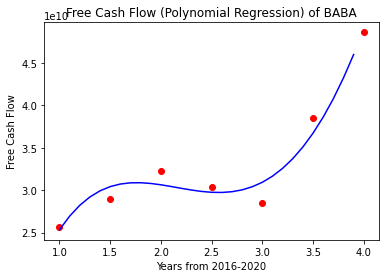

122.67


In [20]:
ticker = "BABA"
print(intrinsicValue(ticker)[0])

<ipython-input-19-d457da777b80>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, abs(y))
/Users/parikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


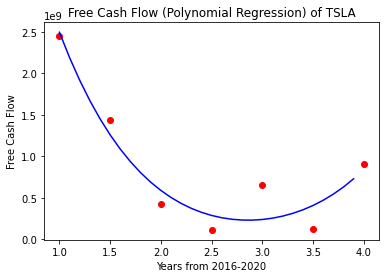

<ipython-input-19-d457da777b80>:46: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(X, abs(y))
/Users/parikh/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


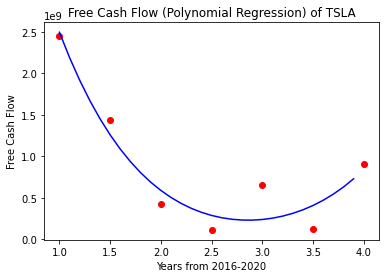

In [23]:
from tkinter import *
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def frame_sentence():
    
    name = name_tf.get()
    ticker = ticker_tf.get()

    disp_tf.insert(0,f'{ticker} = ${findStockTicker(ticker)}')
    disp2_tf.insert(0, f'Intrinsic Value of {ticker} = ${intrinsicValue(ticker)[0]}')
    disp3_tf.insert(0,f' {intrinsicValue(ticker)[1]}')

ws = tk.Tk()


cashflowStatements = []
cashflow = yf.Ticker(ticker).cashflow
freeCashFlow4 = float(cashflow.iloc[10][0]) + (cashflow.iloc[-1][0])
freeCashFlow3 = float(cashflow.iloc[10][1]) + (cashflow.iloc[-1][1])
freeCashFlow2 = float(cashflow.iloc[10][2]) + (cashflow.iloc[-1][2])
freeCashFlow1 = float(cashflow.iloc[10][3]) + (cashflow.iloc[-1][3])
freeCashFlow35 = float(freeCashFlow4 + freeCashFlow3)/ 2
freeCashFlow25 = float(freeCashFlow3 + freeCashFlow2) / 2
freeCashFlow15 = float(freeCashFlow2 + freeCashFlow1) / 2
cashflowStatements.append(freeCashFlow4)
cashflowStatements.append(freeCashFlow35)
cashflowStatements.append(freeCashFlow3)
cashflowStatements.append(freeCashFlow25)
cashflowStatements.append(freeCashFlow2)
cashflowStatements.append(freeCashFlow15)
cashflowStatements.append(freeCashFlow1)
years = [4.0,3.5,3.0,2.5,2.0,1.5,1.0]
df = pd.DataFrame()
df [ "Cash Flow Statements"] = cashflowStatements
df [" Years"] = years
y = df.iloc[:, 0].values
X = df.iloc[:, 1].values
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

#figure1 = plt.Figure(figsize=(6,5), dpi=100)
#ax1 = figure1.add_subplot(111)
#bar1 = FigureCanvasTkAgg(figure1, ws)
#bar1.get_tk_widget().pack(side=tk.LEFT, fill=tk.BOTH)
#df.plot(kind='bar', legend=True, ax=ax1)
#ax1.set_title('Country Vs. GDP Per Capita')


ws.title('PythonGuides')
ws.geometry('800x1500')
ws.config(bg='#0f4b6e')

name_tf = Entry(ws)
ticker_tf = Entry(ws)

name_lbl = Label(
    ws,
    text='Name',
    bg='#0f4b6e',
    fg='white'
)
ticker_lbl = Label(
    ws,
    text='Ticker',
    bg='#0f4b6e',
    fg='white'
)


name_lbl.pack()
name_tf.pack()
ticker_lbl.pack()
ticker_tf.pack()

btn = Button(
    ws,
    text='Calculate',
    relief=SOLID,
    command=frame_sentence
)
btn.pack(pady=10)

disp_tf = Entry(
    ws, 
    width=38,
    font=('Arial', 14)
    )

disp_tf.pack(pady=5)

disp2_tf = Entry(
    ws,
    width=38,
    font=('Arial', 14)
    )
disp2_tf.pack(pady=5)


disp3_tf = Entry(
    ws,
    width=85,
    font=('Arial', 14)
    )
disp3_tf.pack(pady=5)


ws.mainloop()